## Tigran Avetisyan - A09160303 - Midterm III

### Grade - 96/100

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from scikitplot.metrics import plot_roc, plot_precision_recall
from sklearn.datasets import make_classification, make_regression, make_gaussian_quantiles
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score, plot_precision_recall_curve
from mlxtend.plotting import plot_decision_regions

plt.style.use("seaborn-white")
warnings.filterwarnings('ignore')

## Problem 1

In [2]:
X, y = make_regression(n_samples = 1000, n_features = 7, n_informative = 3, random_state = 3, noise = 10)

In [3]:
x = pd.DataFrame(X)
x

,0,1,2,3,4,5,6
0,-0.010125,1.291853,1.758626,-2.223449,0.991914,-0.409624,-3.141157
1,0.279601,-0.965618,1.121223,0.862815,-0.390397,0.593260,0.892228
2,-0.953116,1.313383,1.251949,2.027690,-0.550030,2.948011,-1.324454
3,-0.140892,-0.299505,-0.983228,-0.168850,-1.755609,-0.391789,-0.099545
4,1.301935,0.171544,-1.282844,-0.277904,0.094256,-2.599815,1.286200
...,...,...,...,...,...,...,...
995,0.596523,-0.623822,-0.142278,0.927580,-0.040959,0.114656,-1.783514
996,-0.217600,0.179742,1.565036,1.482646,-1.386873,2.470129,0.690391
997,-1.429305,1.288952,0.296132,-0.309001,0.223105,1.691968,0.247613
998,1.038952,0.694052,-0.140786,1.729417,-1.622461,-1.235637,0.631744


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 3)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((600, 7), (600,), (400, 7), (400,))

In [5]:
tree_reg = DecisionTreeRegressor(random_state = 3)

params = {
    "max_leaf_nodes": np.arange(1,20)
}

tree_reg_cv = GridSearchCV(tree_reg, params, cv = 3, scoring = "r2")
tree_reg_cv.fit(X_train, y_train)

print("Best score:", tree_reg_cv.best_score_)
print("Best parameter:", tree_reg_cv.best_params_)

Best score: 0.8748716997928097
Best parameter: {'max_leaf_nodes': 19}


In [6]:
Reg_A = DecisionTreeRegressor(random_state = 3, max_leaf_nodes = 19)
Reg_A.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=19,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=3, splitter='best')

In [7]:
forest_reg = RandomForestRegressor(random_state = 3)

params = {
    "n_estimators": np.arange(1,20),
    "max_features": np.arange(1,20)
}

forest_reg_cv = GridSearchCV(forest_reg, params, cv = 3, scoring = "r2")
forest_reg_cv.fit(X_train, y_train)

print("Best score:", forest_reg_cv.best_score_)
print("Best parameter:", forest_reg_cv.best_params_)

Best score: 0.9612409584025041
Best parameter: {'max_features': 7, 'n_estimators': 19}


In [8]:
Reg_B = RandomForestRegressor(random_state = 3, max_features = 7, n_estimators = 17)
Reg_B.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=7, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=17, n_jobs=None, oob_score=False,
                      random_state=3, verbose=0, warm_start=False)

In [9]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 1), random_state = 3)

params = {
    "n_estimators": np.arange(1,20)
}

ada_reg_cv = GridSearchCV(ada_reg, params, cv = 3, scoring = "r2")
ada_reg_cv.fit(X_train, y_train)

print("Best score:", ada_reg_cv.best_score_)
print("Best parameter:", ada_reg_cv.best_params_)

Best score: 0.6544412507992443
Best parameter: {'n_estimators': 17}


In [10]:
ada_reg2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 2), random_state = 3)

params = {
    "n_estimators": np.arange(1,20)
}

ada_reg2_cv = GridSearchCV(ada_reg2, params, cv = 3, scoring = "r2")
ada_reg2_cv.fit(X_train, y_train)

print("Best score:", ada_reg2_cv.best_score_)
print("Best parameter:", ada_reg2_cv.best_params_)

Best score: 0.8129430565614971
Best parameter: {'n_estimators': 19}


In [11]:
ada_reg3 = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 3), random_state = 3)

params = {
    "n_estimators": np.arange(1,20)
}

ada_reg3_cv = GridSearchCV(ada_reg3, params, cv = 3, scoring = "r2")
ada_reg3_cv.fit(X_train, y_train)

print("Best score:", ada_reg3_cv.best_score_)
print("Best parameter:", ada_reg3_cv.best_params_)

Best score: 0.8971139234071347
Best parameter: {'n_estimators': 19}


Best is with max_depth = 3 and n_estimators = 19

In [12]:
Reg_C = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 3), random_state = 3, n_estimators = 19)
Reg_C.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                  

In [13]:
Reg_A_score = Reg_A.score(X_test, y_test)
Reg_B_score = Reg_B.score(X_test, y_test)
Reg_C_score = Reg_C.score(X_test, y_test)
Reg_A_score_train = Reg_A.score(X_train, y_train)
Reg_B_score_train = Reg_B.score(X_train, y_train)
Reg_C_score_train = Reg_C.score(X_train, y_train)

print("Reg_A_score:", Reg_A_score)
print("Reg_B_score:", Reg_B_score)
print("Reg_C_score:", Reg_C_score)
print("Reg_A_score train:", Reg_A_score_train)
print("Reg_B_score train:", Reg_B_score_train)
print("Reg_C_score train:", Reg_C_score_train)

Reg_A_score: 0.857508590138811
Reg_B_score: 0.9648197619753897
Reg_C_score: 0.8831256165520728
Reg_A_score train: 0.9164563292459502
Reg_B_score train: 0.9945256813013756
Reg_C_score train: 0.9261837080951132


RandomForestRegressor works the best on the dataset with score of 0.96. From the scores we can conclude that the models do not overfit the train data since train test scores are not significantly different.

## Problem 2

In [14]:
X, y = make_gaussian_quantiles(n_samples = 1000, n_features = 12, n_classes = 2, random_state = 3)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((700, 12), (700,), (300, 12), (300,))

In [16]:
svc_poly = svm.SVC(kernel = "poly", random_state = 3)

params = {
    "C": np.linspace(0.1, 100, 10),
    "degree": np.arange(1, 4)
}

svc_poly_cv = GridSearchCV(svc_poly, params, cv = 3, scoring = "accuracy")
svc_poly_cv.fit(X_train, y_train)

print("Best score:", svc_poly_cv.best_score_)
print("Best parameter:", svc_poly_cv.best_params_)

Best score: 0.9400119829304378
Best parameter: {'C': 33.400000000000006, 'degree': 2}


In [17]:
Class_A = svm.SVC(kernel = "poly", random_state = 3, degree = 2, C = 33.400000000000006, probability=True)
Class_A.fit(X_train, y_train)

SVC(C=33.400000000000006, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=2, gamma='scale',
    kernel='poly', max_iter=-1, probability=True, random_state=3,
    shrinking=True, tol=0.001, verbose=False)

In [18]:
svc_rbf = svm.SVC(kernel = "rbf", random_state = 3)

params = {
    "C": np.linspace(0.1, 100, 10),
    "gamma": np.linspace(0.0001, 1, 100)
}

svc_rbf_cv = GridSearchCV(svc_rbf, params, cv = 3, scoring = "accuracy")
svc_rbf_cv.fit(X_train, y_train)

print("Best score:", svc_rbf_cv.best_score_)
print("Best parameter:", svc_rbf_cv.best_params_)

Best score: 0.9371507526013964
Best parameter: {'C': 66.7, 'gamma': 0.0203}


In [19]:
Class_B = svm.SVC(kernel = "rbf", random_state = 3, C = 66.7, gamma = 0.0203, probability=True)
Class_B.fit(X_train, y_train)

SVC(C=66.7, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0203, kernel='rbf',
    max_iter=-1, probability=True, random_state=3, shrinking=True, tol=0.001,
    verbose=False)

In [20]:
Class_A_score_test = Class_A.score(X_test, y_test)
Class_B_score_test = Class_B.score(X_test, y_test)

print("Class_A test score:", Class_A_score_test)
print("Class_B test score:", Class_B_score_test)

Class_A test score: 0.95
Class_B test score: 0.9466666666666667


Above we can see that "rbf" kernel has the best score, hence Class_B model works the best in terms of accuracy scores.

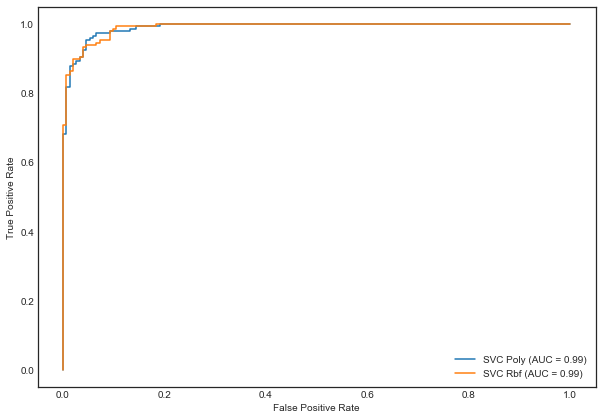

In [21]:
fig = plt.figure(figsize = (10, 7))
ax = plt.gca()
poly_disp = plot_roc_curve(Class_A, X_test, y_test, ax = ax, name = "SVC Poly")
rbf_disp = plot_roc_curve(Class_B, X_test, y_test, ax = ax, name = "SVC Rbf")
plt.show()

From the ROC curve we can see that the models work almost the same, since they have almost equal AUCs.

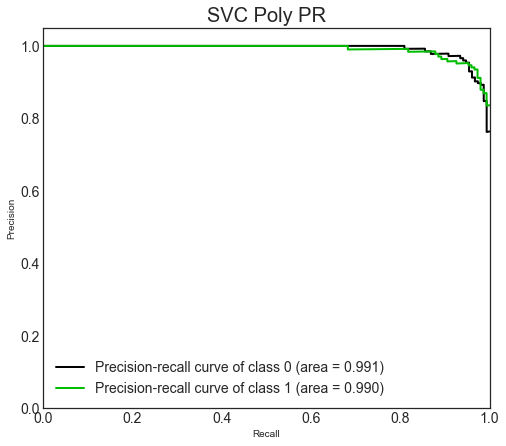

In [22]:
poly_proba = Class_A.predict_proba(X_test)
rbf_proba = Class_B.predict_proba(X_test)

plot_precision_recall(y_test, poly_proba,
                      figsize = (8, 7),
                      title_fontsize = 20,
                      text_fontsize = 14,
                      plot_micro = False,
                      title = "SVC Poly PR")
plt.show()

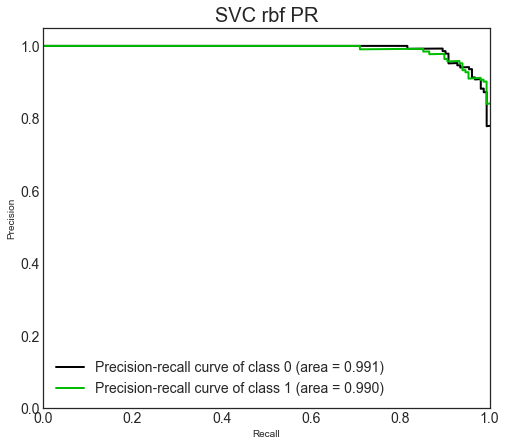

In [23]:
plot_precision_recall(y_test, rbf_proba, figsize = (8, 7),
                      title_fontsize = 20,
                      text_fontsize = 14,
                      plot_micro = False,
                      title = "SVC rbf PR")
plt.show()

From the PR curves we can see that the Class_B model has the best values for AUCPR, 0.994 for 0 class and 0.995 for 1 class. Comparing with the Class_A AUCPRs, 0.991 for class 0 and 0.993 for class 1 we can see that Class_B does the best job.

In [24]:
Class_A_score = Class_A.score(X_test, y_test)
Class_B_score = Class_B.score(X_test, y_test)
Class_A_score_train = Class_A.score(X_train, y_train)
Class_B_score_train = Class_B.score(X_train, y_train)

print("Class_A_score:", Class_A_score)
print("Class_B_score:", Class_B_score)
print("Class_A_score train:", Class_A_score_train)
print("Class_B_score train:", Class_B_score_train)

Class_A_score: 0.95
Class_B_score: 0.9466666666666667
Class_A_score train: 0.9914285714285714
Class_B_score train: 0.9985714285714286


From above we can see that there is not any big difference between train and test scores for both models, hence the models do not overfit the train data.

Overall, Class_B model performs the best on the data.